#KNN - K Nearest Neighbours Model

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Outcome=1 diabet Outcome=0 normal
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


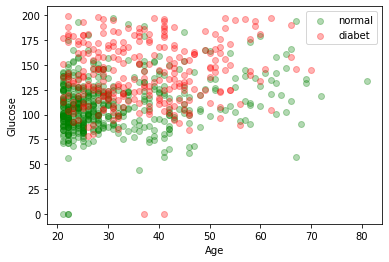

In [58]:
diabet_people = data[data.Outcome == 1]
normal_people = data[data.Outcome == 0]

plt.scatter(normal_people.Age, normal_people.Glucose, color="green", label="normal", alpha = 0.3)
plt.scatter(diabet_people.Age, diabet_people.Glucose, color="red", label="diabet", alpha=0.3)

plt.xlabel("Age")
plt.ylabel("Glucose")

plt.legend()
plt.show()

In [59]:
# x,y eksenleri
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"], axis=1) #KNN için dependent veri çıkarıyoruz, independent veriler kalıyor

#normalizasyon, büyük ve küçük veriler yanıltmaması için ekliyoruz
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

#eski
print("ham veri")
print(x_ham_veri.head())
#sonra
print("\nNormalization")
print(x.head())


ham veri
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Normalization
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447

In [60]:
#train data test datası
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.1,random_state=1)

#knn modeli
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K=3 için doğrulama test sonucu: ", knn.score(x_test, y_test))

K=3 için doğrulama test sonucu:  0.8311688311688312


In [61]:
# k kaç olmalı
count=1

for j in range(1,11):
  knn_new = KNeighborsClassifier(n_neighbors=j)
  knn_new.fit(x_train, y_train)
  print(count," ", "Doğruluk oranı: %",knn_new.score(x_train,y_train)*100)
  count+=1



1   Doğruluk oranı: % 100.0
2   Doğruluk oranı: % 82.77858176555716
3   Doğruluk oranı: % 85.09406657018813
4   Doğruluk oranı: % 82.19971056439942
5   Doğruluk oranı: % 82.4891461649783
6   Doğruluk oranı: % 80.02894356005788
7   Doğruluk oranı: % 79.59479015918957
8   Doğruluk oranı: % 79.45007235890014
9   Doğruluk oranı: % 79.45007235890014
10   Doğruluk oranı: % 78.8712011577424


In [67]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri.values)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1